## Customer Segmentation and Deposit Detection System 

In [1]:
# import necessary libraries 

# data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Classifier libraries 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv("bank - bank.csv")
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [3]:
df.shape

(45211, 17)

In [4]:
df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [5]:
df.columns = ["age", "job", "marital", "education", "default", "balance", "housing", "loan","contact", "day","month", "duration", "campaign", "Last_contacted_after_campaign", "Previous_contact_before_campaign", "Previous_marketing_campaign", "deposit"]
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Last_contacted_after_campaign,Previous_contact_before_campaign,Previous_marketing_campaign,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [6]:
#Data verification - Data type,number of features and rows , missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age                               45211 non-null  int64 
 1   job                               45211 non-null  object
 2   marital                           45211 non-null  object
 3   education                         45211 non-null  object
 4   default                           45211 non-null  object
 5   balance                           45211 non-null  int64 
 6   housing                           45211 non-null  object
 7   loan                              45211 non-null  object
 8   contact                           45211 non-null  object
 9   day                               45211 non-null  int64 
 10  month                             45211 non-null  object
 11  duration                          45211 non-null  int64 
 12  campaign          

In [7]:
df.describe()

,age,balance,day,duration,campaign,Last_contacted_after_campaign,Previous_contact_before_campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# obtaining a summary of the unique values present in each object-type column of the DataFrame
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Previous_marketing_campaign
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


In [9]:
# Exploring categorical feature
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'Previous_marketing_campaign']

age                                 0
job                                 0
marital                             0
education                           0
default                             0
balance                             0
housing                             0
loan                                0
contact                             0
day                                 0
month                               0
duration                            0
campaign                            0
Last_contacted_after_campaign       0
Previous_contact_before_campaign    0
Previous_marketing_campaign         0
deposit                             0
dtype: int64


<AxesSubplot:>

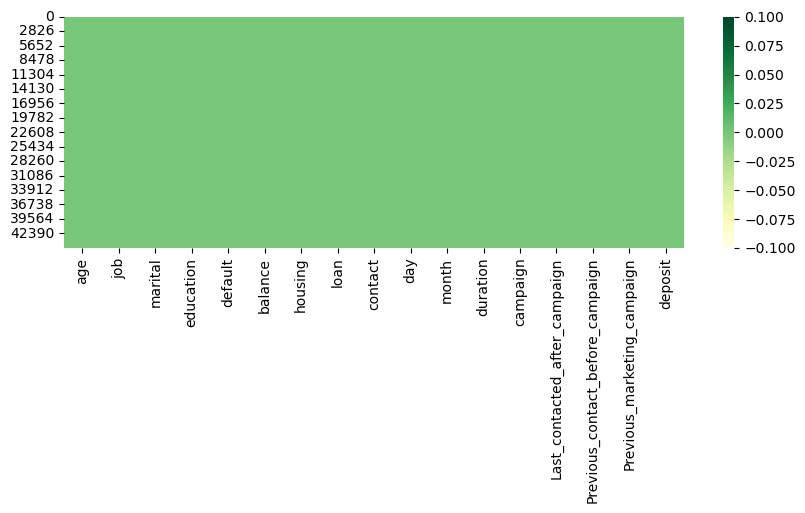

In [10]:
# Checking for missing data

print(df.isnull().sum())
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="YlGn")

##### From details above its certian that there is no missing data

### Exploratory Data Analysis

#### Univariate Analysis

In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'Last_contacted_after_campaign', 'Previous_contact_before_campaign',
       'Previous_marketing_campaign', 'deposit'],
      dtype='object')

In [12]:
# Extract the age column from the DataFrame and compute its summary statistics

age = df["age"]
mean_age = np.mean(age)
median_age = np.median(age)
std_age = np.std(age)

print("Mean age: ", mean_age)
print("Median age: ", median_age)
print("Standard deviation of age: ", std_age)

Mean age:  40.93621021432837
Median age:  39.0
Standard deviation of age:  10.61864460472364


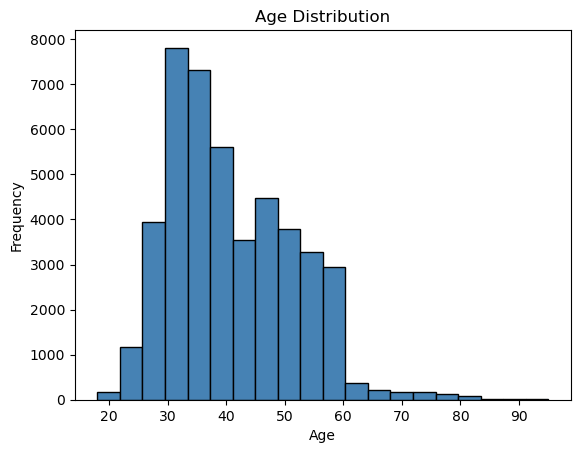

In [13]:
# Create a histogram to visualize the age distribution

plt.hist(age, bins=20, color='steelblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


###### . From the histogram visualizations the distribution for the age is positively skewed
###### .  The most common age range for the customers is between the age of 30 to 40 years 

In [14]:
# Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['deposit', categorical_feature]).size())

deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

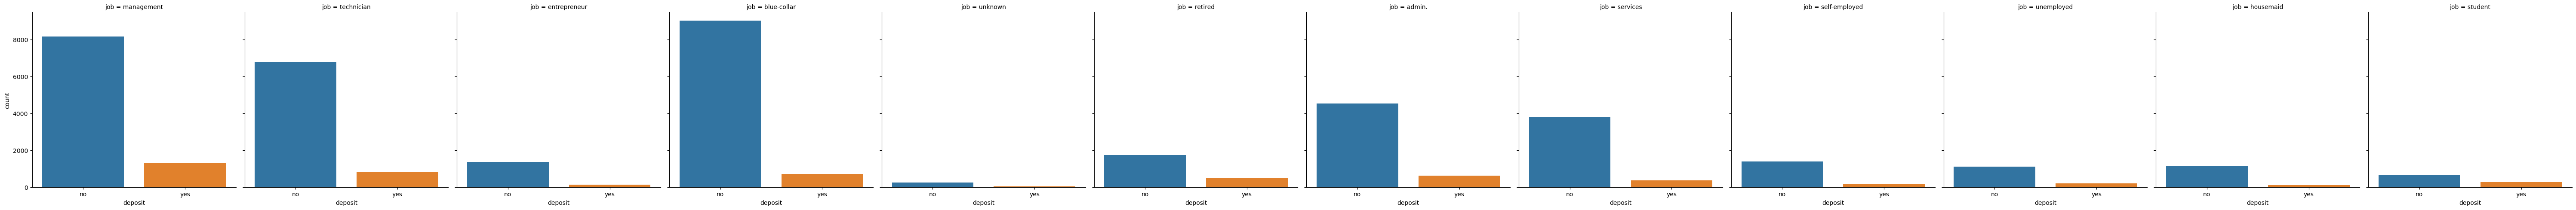

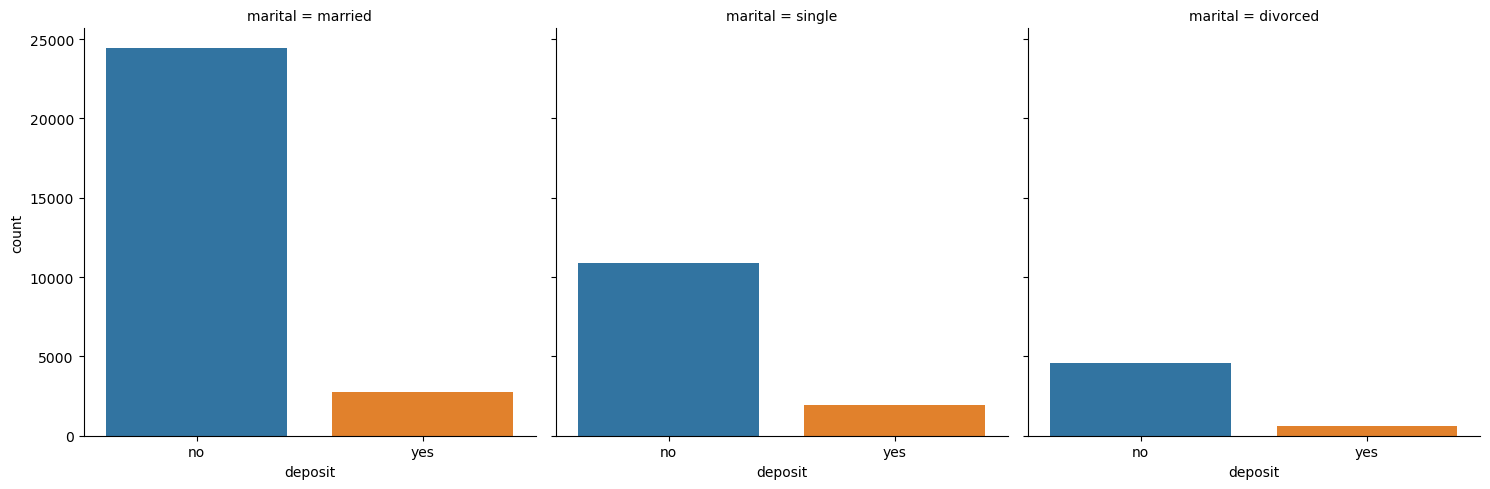

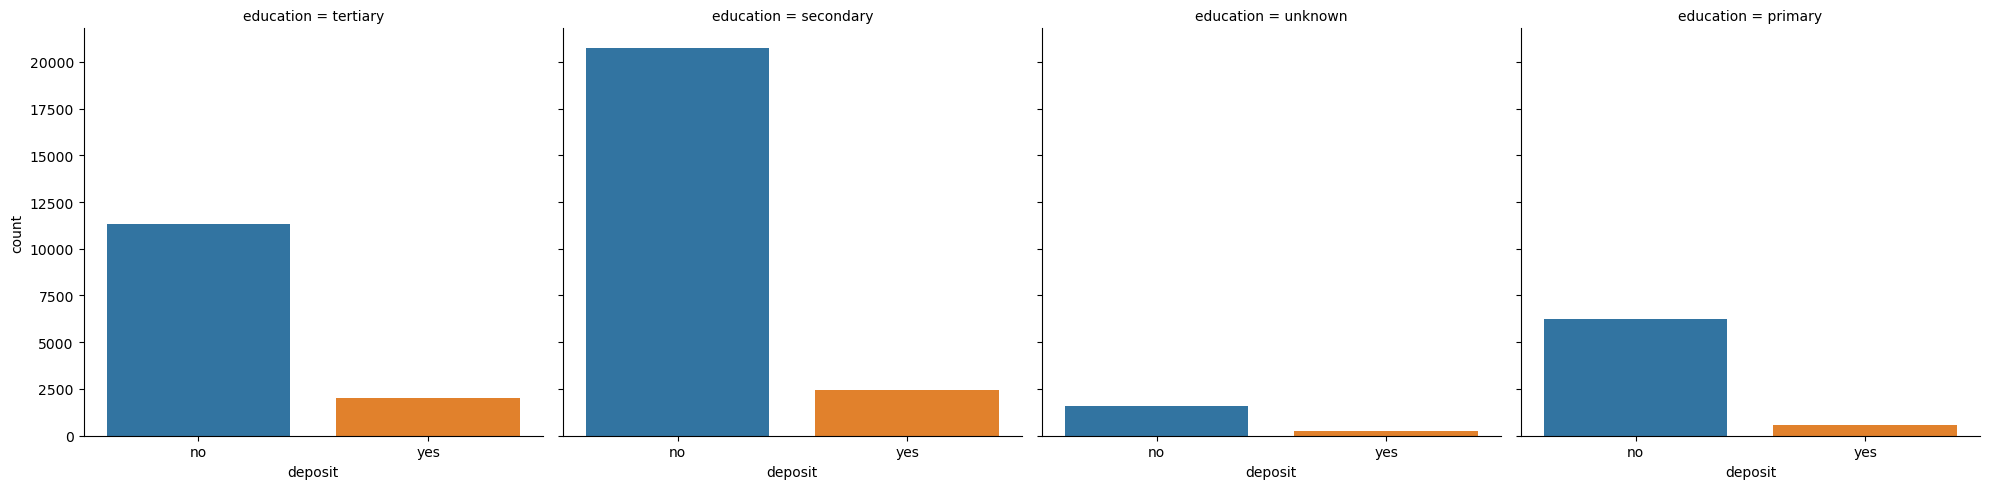

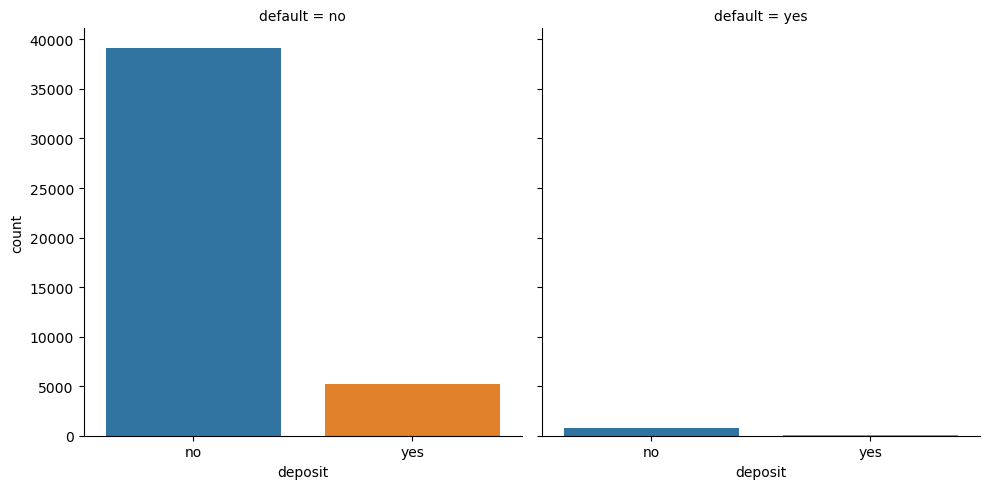

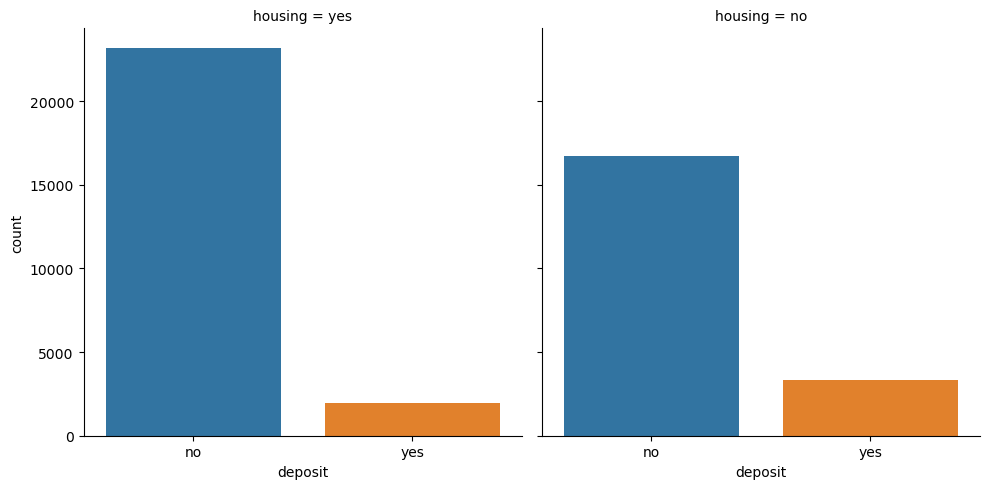

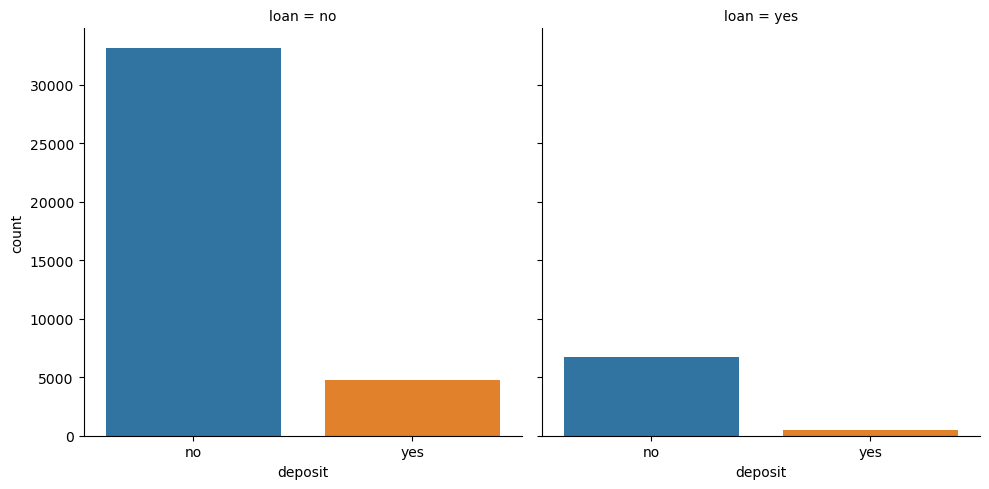

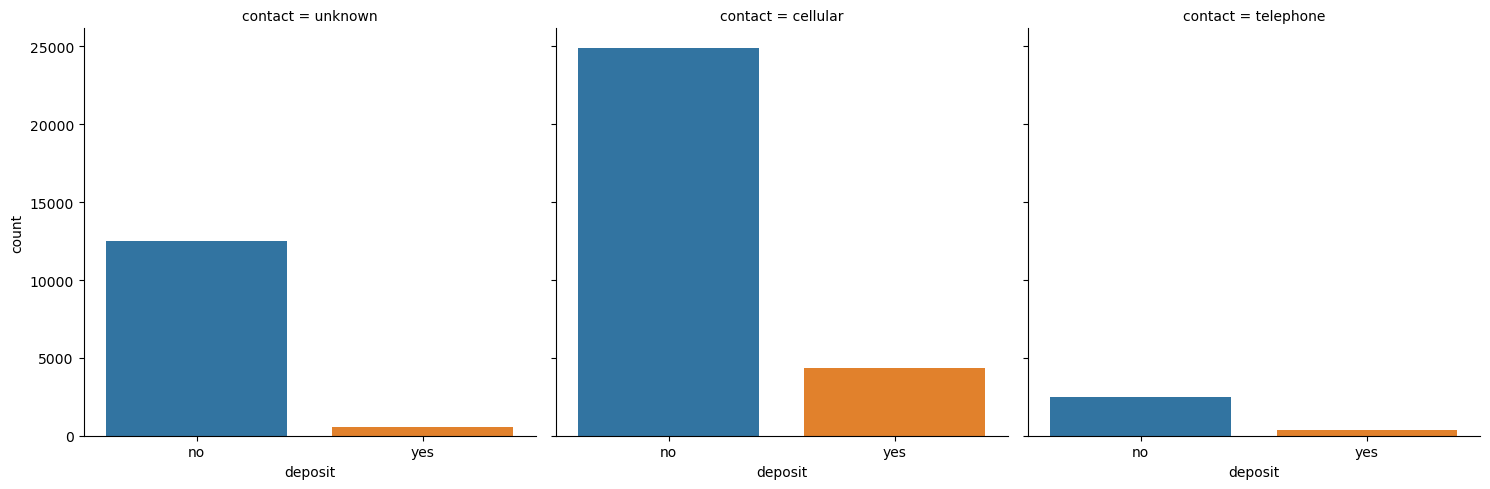

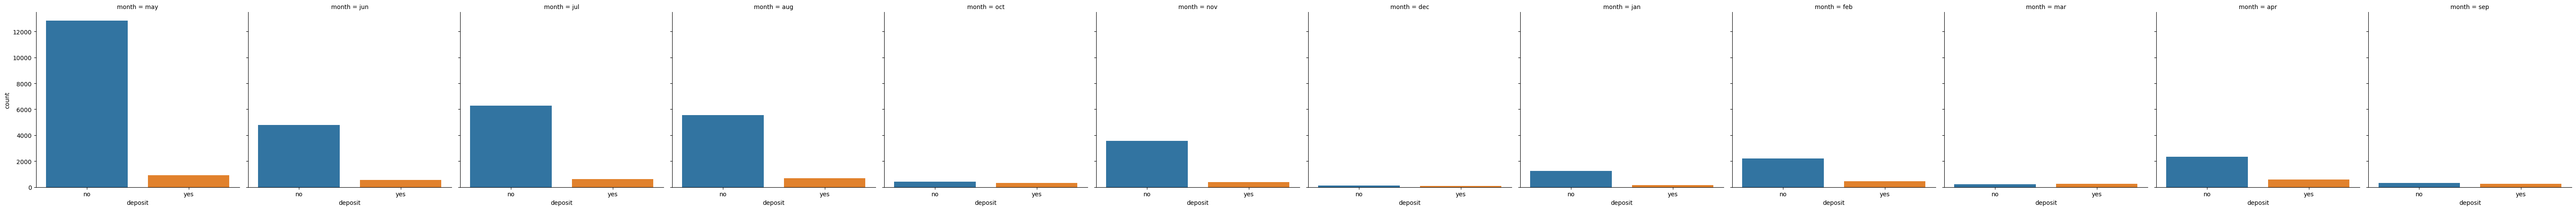

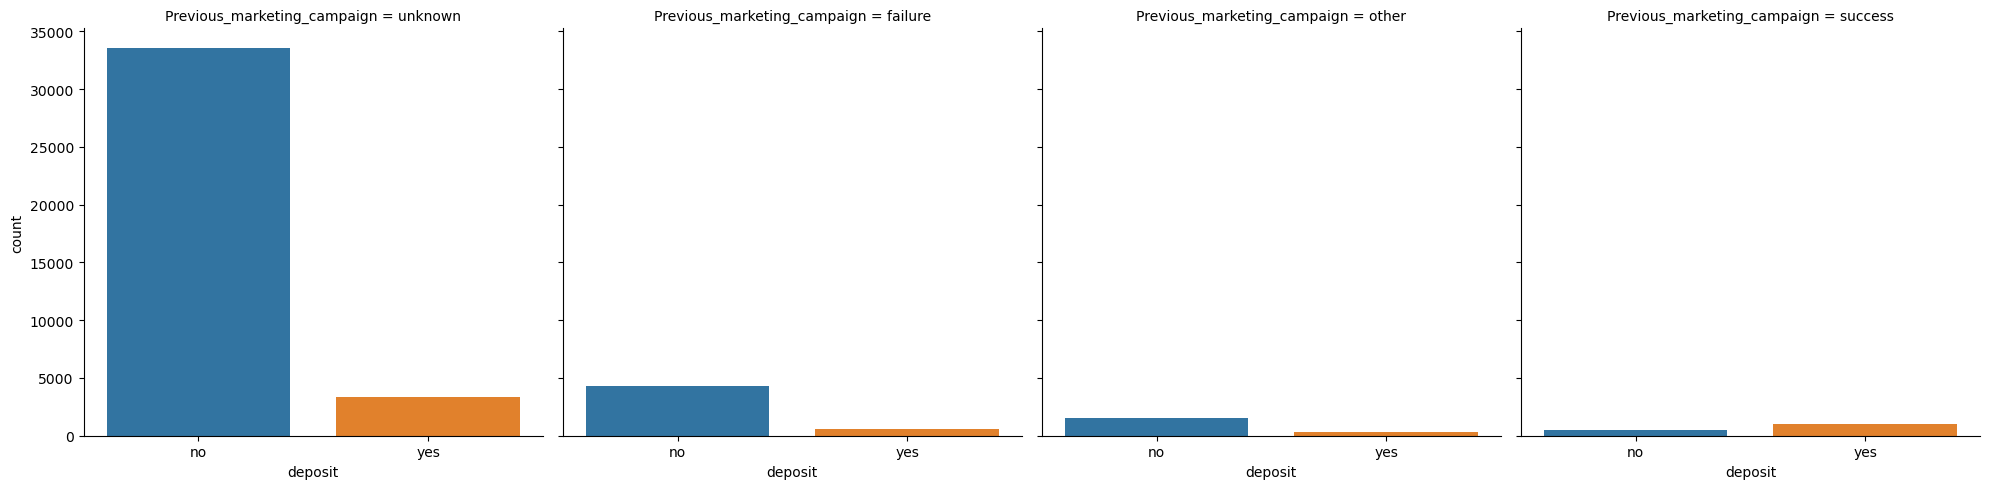

In [15]:
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data=df)
plt.show()

#### . Customers that are contacted via celluler deposited more than those contacted via other medium.
#### . Customers with no loan had a higher interest to make deposit compared to customer with loan
#### .  Customers with secondary education have  more interest to depositing with a small marhing compared to customers at the tertiary education 

In [16]:
# Count the frequency of each job type
job_counts = df["job"].value_counts()

# Calculate the proportion of each job type
job_proportions = job_counts / job_counts.sum()

# Print the frequency and proportion of each job type
for job, count, proportion in zip(job_counts.index, job_counts.values, job_proportions.values):
    print(f"Job: {job} \t Count: {count} \t Proportion: {proportion:.2%}")
    

Job: blue-collar 	 Count: 9732 	 Proportion: 21.53%
Job: management 	 Count: 9458 	 Proportion: 20.92%
Job: technician 	 Count: 7597 	 Proportion: 16.80%
Job: admin. 	 Count: 5171 	 Proportion: 11.44%
Job: services 	 Count: 4154 	 Proportion: 9.19%
Job: retired 	 Count: 2264 	 Proportion: 5.01%
Job: self-employed 	 Count: 1579 	 Proportion: 3.49%
Job: entrepreneur 	 Count: 1487 	 Proportion: 3.29%
Job: unemployed 	 Count: 1303 	 Proportion: 2.88%
Job: housemaid 	 Count: 1240 	 Proportion: 2.74%
Job: student 	 Count: 938 	 Proportion: 2.07%
Job: unknown 	 Count: 288 	 Proportion: 0.64%


#### .The blue collar and managemet jobs are the two most frequent job type in the dataset while student and unknown type of job are the least frequent

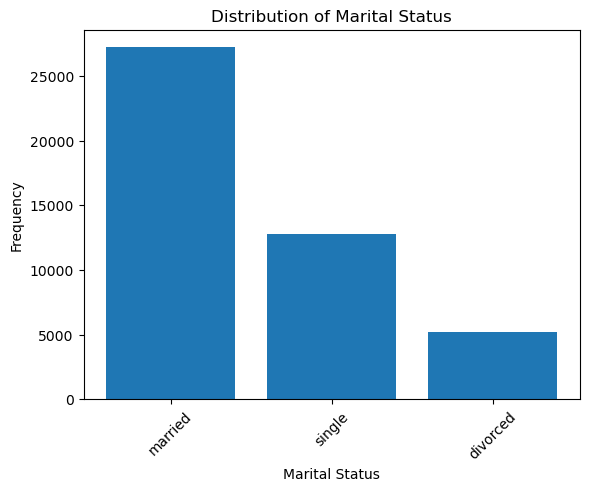

Marital Status: married 	 Count: 27214 	 Percentage: 60.19%
Marital Status: single 	 Count: 12790 	 Percentage: 28.29%
Marital Status: divorced 	 Count: 5207 	 Percentage: 11.52%


In [17]:
# Count the frequency of each marital status category
marital_counts = df["marital"].value_counts()

# Calculate the percentage of each marital status category
marital_percentages = marital_counts / marital_counts.sum() * 100

# Create a bar chart to visualize the distribution of marital status categories
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title("Distribution of Marital Status")
plt.xticks(rotation=45)
plt.show()

# Print the percentage of each marital status category
for status, count, percentage in zip(marital_counts.index, marital_counts.values, marital_percentages.values):
    print(f"Marital Status: {status} \t Count: {count} \t Percentage: {percentage:.2f}%")

 #### .The bar chat shows that the married category has the highest percentage of groups witha percentage of 60.19% followed by the single category with a percentage of 28.29%.
 #### .The percentage of divorce group is quite low which can be an indicator of biases and it shoukd be taken into account in subsequent analyses.


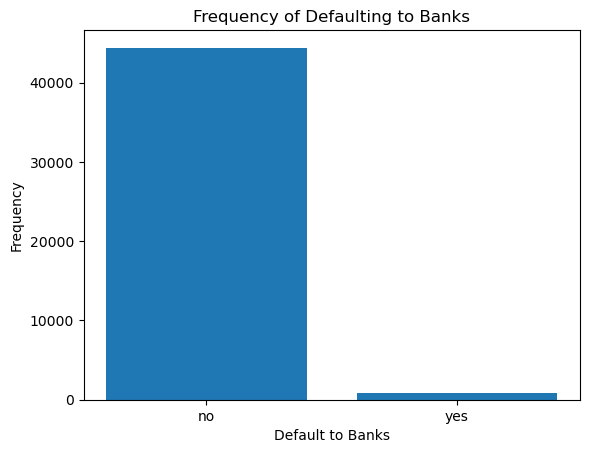

Default: no 	 Count: 44396 	 Proportion: 98.20%
Default: yes 	 Count: 815 	 Proportion: 1.80%


In [18]:
# Count the frequency of defaulting to bank
default_counts = df["default"].value_counts()

# Calculate the proportion of defaults
default_proportion = default_counts / default_counts.sum()

# Create a bar chart to visualize the frequency of defaulting to banks
plt.bar(default_counts.index, default_counts.values)
plt.xlabel("Default to Banks")
plt.ylabel("Frequency")
plt.title("Frequency of Defaulting to Banks")
plt.show()

# Print the proportion of defaults
for default, count, proportion in zip(default_counts.index, default_counts.values, default_proportion.values):
    print(f"Default: {default} \t Count: {count} \t Proportion: {proportion:.2%}")

#### .The proportion of customers that defaulted is 1.80% which is very good for the bank considering the fact that most customers always respond to their obligations at the bank.

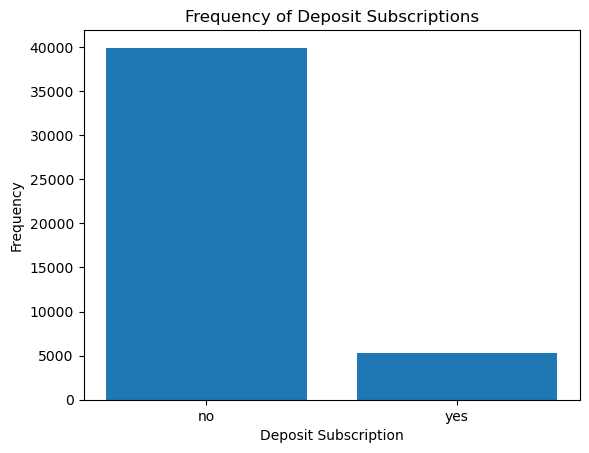

Subscription: no 	 Count: 39922 	 Proportion: 88.30%
Subscription: yes 	 Count: 5289 	 Proportion: 11.70%


In [19]:
# Count the frequency of deposit subscriptions
subscription_counts = df["deposit"].value_counts()

# Calculate the proportion of subscribers
subscription_proportion = subscription_counts / subscription_counts.sum()

# Create a bar chart to visualize the frequency of deposit subscriptions
plt.bar(subscription_counts.index, subscription_counts.values)
plt.xlabel("Deposit Subscription")
plt.ylabel("Frequency")
plt.title("Frequency of Deposit Subscriptions")
plt.show()

# Print the proportion of subscribers
for subscription, count, proportion in zip(subscription_counts.index, subscription_counts.values, subscription_proportion.values):
    print(f"Subscription: {subscription} \t Count: {count} \t Proportion: {proportion:.2%}")


#### The amount of deposit is at 11.70% which is a very poor turnout of deposit by customers to the bank 

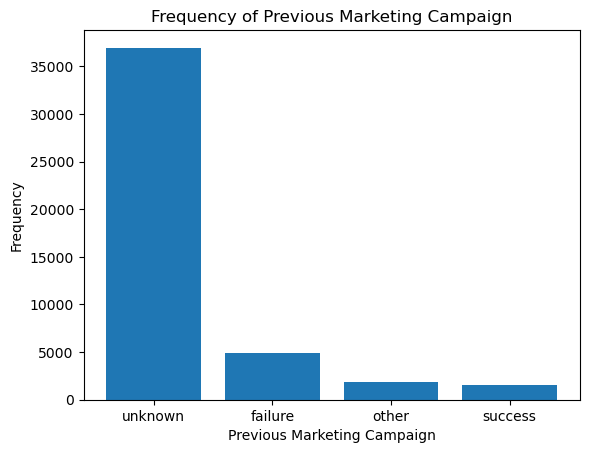

Campaign: unknown 	 Count: 36959 	 Proportion: 81.75%
Campaign: failure 	 Count: 4901 	 Proportion: 10.84%
Campaign: other 	 Count: 1840 	 Proportion: 4.07%
Campaign: success 	 Count: 1511 	 Proportion: 3.34%


In [20]:
# Count the frequency of the previous marketing campaign
campaign_counts = df["Previous_marketing_campaign"].value_counts()

# Calculate the proportion of the previous marketing campaign
campaign_proportion = campaign_counts / campaign_counts.sum()

# Create a bar chart to visualize the frequency of the previous marketing campaign
plt.bar(campaign_counts.index, campaign_counts.values)
plt.xlabel("Previous Marketing Campaign")
plt.ylabel("Frequency")
plt.title("Frequency of Previous Marketing Campaign")
plt.show()

# Print the proportion of the previous marketing campaign
for campaign, count, proportion in zip(campaign_counts.index, campaign_counts.values, campaign_proportion.values):
    print(f"Campaign: {campaign} \t Count: {count} \t Proportion: {proportion:.2%}")



#### . The high percentage of unknown outcomes (81%) suggests a lack of data or missing information about the campaign's success or failure. This can limit the accuracy of the analysis and make it difficult to draw definitive conclusions.
#### The high unknown rate may indicate issues with data quality or tracking mechanisms.

### Multivariate Analysis

<AxesSubplot:>

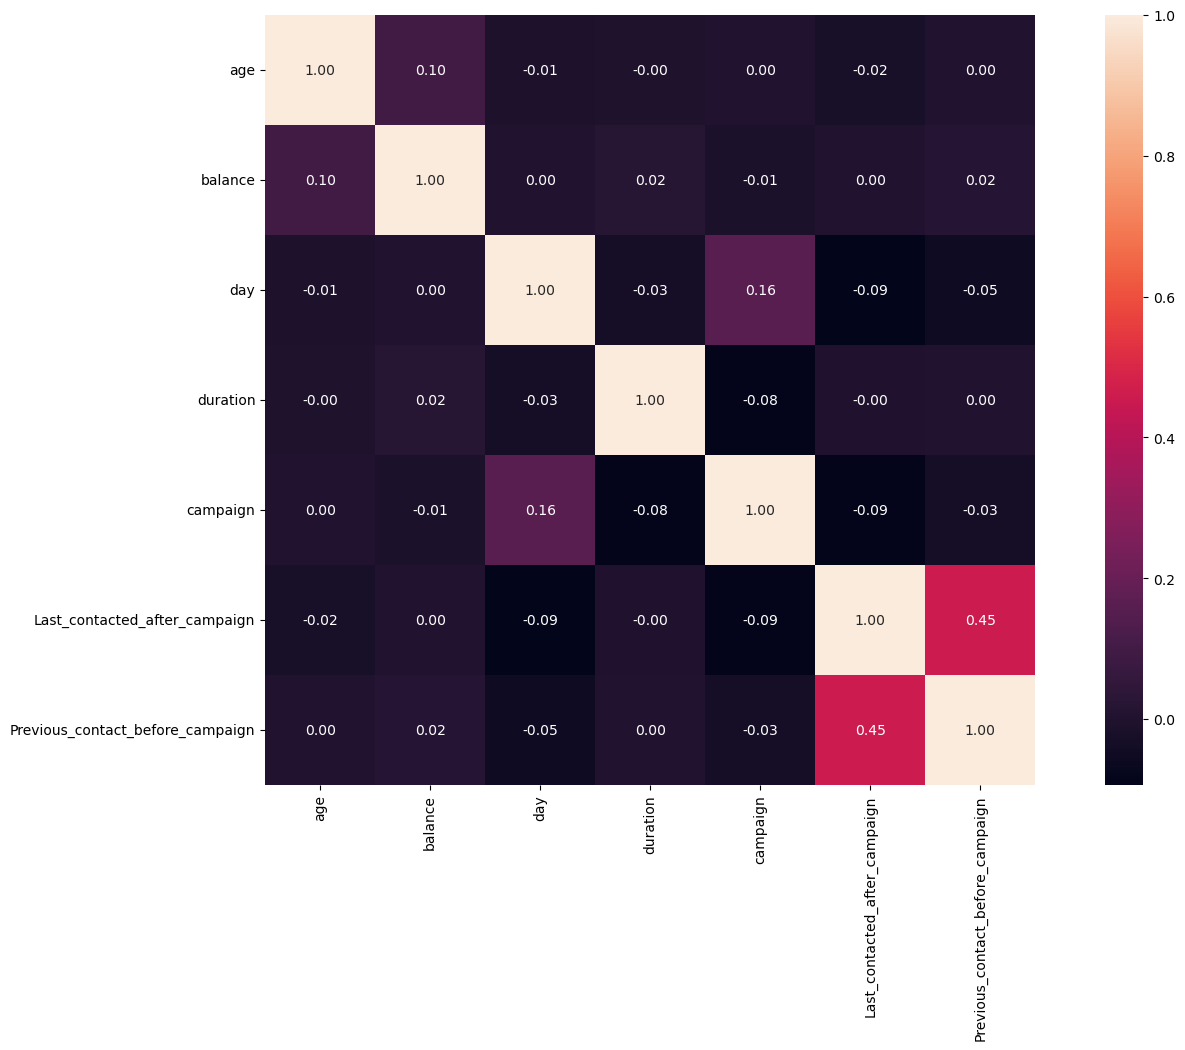

In [21]:
# Visualize the correlation  using a heatmap
plt.figure(figsize=(18, 10))
selected_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'Last_contacted_after_campaign', 'Previous_contact_before_campaign',
       'Previous_marketing_campaign', 'deposit']
df_subset = df[selected_columns] 
sns.heatmap(df_subset.corr(), cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size': 10})


#### . There are no much correlations between the variables except for last contacted after campaign and previous contact before campaign which are slight relationship.

### Feature Engineering

In [22]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Last_contacted_after_campaign,Previous_contact_before_campaign,Previous_marketing_campaign,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [23]:
df2=df.copy()

In [24]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Last_contacted_after_campaign,Previous_contact_before_campaign,Previous_marketing_campaign,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df2.shape

(45211, 17)

In [26]:
# Checking if default feature play an important role 
df2.groupby(['deposit','default']).size()

deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

In [27]:
df2.groupby(['deposit','Last_contacted_after_campaign'],).size()

deposit  Last_contacted_after_campaign
no       -1                               33570
          1                                   9
          2                                  35
          3                                   1
          4                                   1
                                          ...  
yes       804                                 1
          805                                 1
          828                                 1
          842                                 1
          854                                 1
Length: 914, dtype: int64

In [28]:
#Drop Last_contacted_after_campaign as it has -1 for majority of the value
df2.drop(['Last_contacted_after_campaign'],axis=1, inplace=True)

In [29]:
 df2.groupby(['deposit','duration'],sort=True)['duration'].count()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

In [30]:
 df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [31]:
 df3 = df2[df2['campaign']< 33]

In [32]:
df3.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5

In [33]:
# Remove outliers for previous contact before campaign
df3.groupby(['deposit','Previous_contact_before_campaign'],sort=True)['Previous_contact_before_campaign'].count()

deposit  Previous_contact_before_campaign
no       0                                   33532
         1                                    2189
         2                                    1650
         3                                     848
         4                                     543
                                             ...  
yes      26                                      1
         29                                      1
         30                                      1
         55                                      1
         58                                      1
Name: Previous_contact_before_campaign, Length: 66, dtype: int64

In [34]:
df4= df3[df3['Previous_contact_before_campaign'] < 31]

In [35]:
df4.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,Previous_contact_before_campaign,Previous_marketing_campaign,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,no


In [36]:
print(df4.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'Previous_contact_before_campaign', 'Previous_marketing_campaign',
       'deposit'],
      dtype='object')


In [37]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month','Previous_marketing_campaign']

# Apply one-hot encoding to the categorical columns
df4 = pd.get_dummies(df, columns=cat_columns, prefix=cat_columns, prefix_sep='_', drop_first=True)
df4

,age,default,balance,housing,loan,day,duration,campaign,Last_contacted_after_campaign,Previous_contact_before_campaign,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Previous_marketing_campaign_other,Previous_marketing_campaign_success,Previous_marketing_campaign_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
bool_columns = ['default','housing','loan','deposit']
for col in bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [39]:
df4.head()

,age,balance,day,duration,campaign,Last_contacted_after_campaign,Previous_contact_before_campaign,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,Previous_marketing_campaign_other,Previous_marketing_campaign_success,Previous_marketing_campaign_unknown,default_new,housing_new,loan_new,deposit_new
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Split Dataset into Training set and Test set

In [40]:
X =df4.drop(['deposit_new'],axis=1)
y =df4['deposit_new']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
len(X_train)

36168

In [42]:
len(X_test)

9043

### Model Selection

In [43]:
#Logistic regression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8882008183125069
Precision: 0.6020408163265306
Recall: 0.21631530705774518
F1-score: 0.31827376938637897
AUC-ROC: 0.5983488004101604


#### Based on these metrics, it appears that the logistic regression model may have some limitations in correctly identifying positive instances (low recall) and providing slightly high precision 60.2%

In [44]:
ly_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
y_test


3776     0
9928     0
33409    0
31885    0
15738    0
        ..
13353    0
38732    1
5654     0
3779     0
11677    0
Name: deposit_new, Length: 9043, dtype: int64

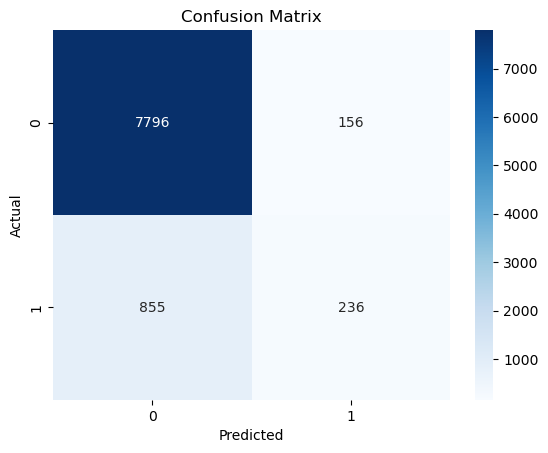

In [46]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [47]:
lcm = confusion_matrix(y_test, ly_pred)
lcm

array([[7796,  156],
       [ 855,  236]], dtype=int64)

#### .The top-left value of the matrix, 7796, represents the count of instances that were correctly predicted as the truly negative while the top-right value, 156, indicates the count of instances that were incorrectly predicted as falsely positive.
#### .The bottom-left value, 855, represents the count of instances that were incorrectly predicted as false negative while the bottom-right value, 236, indicates the count of instances that were correctly predicted as truly negative 

In [51]:
# Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print('RandomForestClassifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, rfy_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

RandomForestClassifier
Accuracy: 0.9035718235098972
Precision: 0.664167916041979
Recall: 0.4060494958753437
F1-score: 0.5039817974971559
AUC-ROC: 0.6889402408954184


#### The accuracy of the model is 0.905, which means that it correctly predicts the outcome for approximately 90.5% of the cases
#### Overall, the model exhibits good accuracy

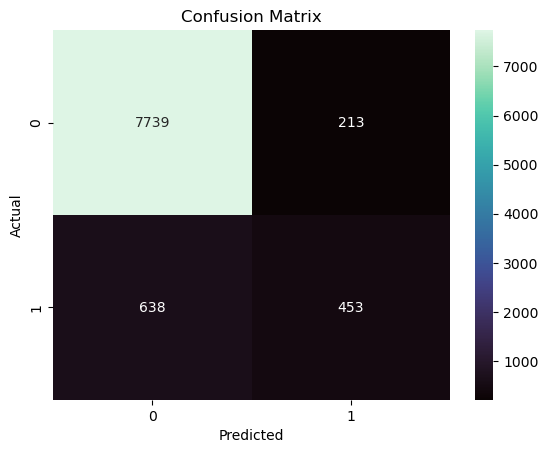

In [49]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)
sns.heatmap(rcm, annot=True, cmap='mako', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### .he top-left value of the matrix, 7731, represents the count of instances that were correctly predicted as the True negative while the top-right value, 221, indicates the count of instances that were incorrectly predicted as false positive
#### The bottom-left value, 645, represents the count of instances that were incorrectly predicted as the false negative while The bottom-right value, 446, indicates the count of instances that were correctly predicted as true positive

In [50]:
rcm = confusion_matrix(y_test, rfy_pred)
rcm

array([[7739,  213],
       [ 638,  453]], dtype=int64)

### Model Evaluation

###### 

#### From the values gotten its obvious the Random Forest Classifier model had better performance overall compared to Logistic regression
#### The accuracy value of Random Forest Classifier model is  0.90(90%) compared to Logistic regression which is  0.89(89%)  while precision value is 0.66(66%) compared to Logistic regression which is 0.60(60%).

### Recommendations

##### 1 The success rate below 4% signals a need for reflection, strategic adjustments, and a data-driven approach to improve campaign effectiveness and achieve better results. 
##### 2 The high unknown rate may indicate issues with data quality or tracking mechanisms. It is essential to investigate and address any potential shortcomings in data collection, recording, or tracking systems to ensure reliable and comprehensive data for analysis.
##### 3 The category "unknown" suggests a lack of information about how customers were contacted. It is important to improve data collection processes to accurately track and categorize customer communication channels.
##### 4 While cellular contact showed higher deposit rates, it is worth examining the performance of telephone communication. Identify areas of improvement in telephone contact, such as refining scripts, training agents for effective communication, and offering personalized assistance.